## Sampling
Simple sampling with pandas

Throughout this chapter, you'll be exploring song data from Spotify. Each row of this population dataset represents a song, and there are over 40,000 rows. Columns include the song name, the artists who performed it, the release year, and attributes of the song like its duration, tempo, and danceability. You'll start by looking at the durations.

First task is to sample the Spotify dataset and compare the mean duration of the population with the sample.

In [7]:
import pandas as pd
import numpy as np

In [8]:
spotify_population = pd.read_feather('/Users/starburned/data_analytics_projects/data/spotify_2000_2020.feather')

In [9]:
spotify_population.head()

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.97200,['David Bauer'],0.567,313293.0,5.221550,0.227,0.0,0w0D8H1ubRerCXHWYJkinO,0.601000,10.0,0.110,-13.441,1.0,Shout to the Lord,47.0,2000,0.0290,136.123,0.0396,2000.0
1,0.32100,['Etta James'],0.821,360240.0,6.004000,0.418,0.0,4JVeqfE2tpi7Pv63LJZtPh,0.000372,9.0,0.222,-9.841,0.0,Miss You,51.0,2000-12-12,0.0407,117.382,0.8030,2000.0
2,0.00659,['Quasimoto'],0.706,202507.0,3.375117,0.602,1.0,5pxtdhLAi0RTh1gNqhGMNA,0.000138,11.0,0.400,-8.306,0.0,Real Eyes,44.0,2000-06-13,0.3420,89.692,0.4790,2000.0
3,0.00390,['Millencolin'],0.368,173360.0,2.889333,0.977,0.0,3jRsoe4Vkxa4BMYqGHX8L0,0.000000,11.0,0.350,-2.757,0.0,Penguins & Polarbears,52.0,2000-02-22,0.1270,165.889,0.5480,2000.0
4,0.12200,['Steve Chou'],0.501,344200.0,5.736667,0.511,0.0,4mronxcllhfyhBRqyZi8kU,0.000000,7.0,0.279,-9.836,0.0,黃昏,53.0,2000-12-25,0.0291,78.045,0.1130,2000.0


In [10]:
len(spotify_population)

41656

In [11]:
# Sample 1000 rows from spotify_population
spotify_sample = spotify_population.sample(n=1000)

In [12]:
# Calculate the mean duration in mins from spotify_population
mean_dur_pop = spotify_population['duration_minutes'].mean()

In [13]:
mean_dur_pop

3.8521519140900073

In [15]:
# Calculate the mean duration in mins from spotify_sample
mean_dur_samp = spotify_sample['duration_minutes'].mean()

In [16]:
mean_dur_samp

3.8617513833333335

In [17]:
# Create a pandas Series from the loudness column of spotify_population
loudness_pop = spotify_population['loudness']
loudness_pop.mean()

-7.366856851353947

In [18]:
# Sample 100 values of loudness_pop
loudness_samp = loudness_pop.sample(n=100)
loudness_samp.mean()

-7.4856799999999994

The Spotify dataset contains an acousticness column, which is a confidence measure from zero to one of whether the track was made with instruments that aren't plugged in. Compare the acousticness distribution of the total population of songs with a sample of those songs.

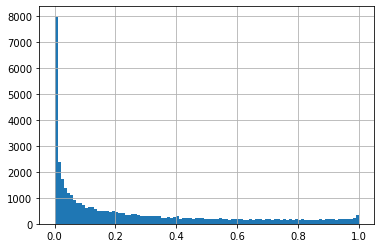

In [20]:
# Visualize the distribution of acousticness with a histogram
spotify_population['acousticness'].hist(bins=np.arange(0, 1.01, 0.01));

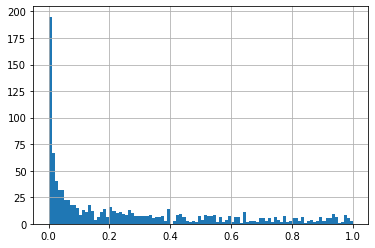

In [24]:
# Update the histogram to use spotify sample
spotify_sample['acousticness'].hist(bins=np.arange(0, 1.01, 0.01));

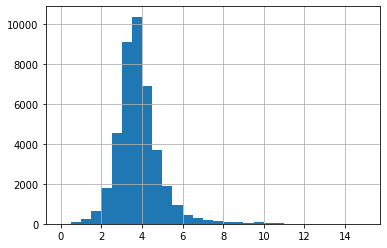

In [26]:
# Visualize the distribution of duration_minutes as a histogram
spotify_population['duration_minutes'].hist(bins=np.arange(0, 15.5, 0.5));